In this kernel, I build two Random Forest Classifier models to predict the safety of the car, one with 10 decision-trees and another one with 1000 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the feature selection process using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy.

# Importing Libraries and Dataset

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [76]:
df = pd.read_csv('car_evaluation.csv')

# EDA

In [78]:
#Viewing dimension

df.shape

(1727, 7)

In [79]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [80]:
#Rename column names

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [81]:
#Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [82]:
#frequency of distribution of values in variables

for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [83]:
#exploring target variable

df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [84]:
#Checking for Missing Values:

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [85]:
# declare feature vector and target variable

X = df.drop(['class'], axis=1)

y = df['class']

In [86]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [87]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

# Feature Engineering

In [89]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Encode categorical variables

In [91]:
#Since THEY ARE ORDINAL VARIABLES
from category_encoders import OrdinalEncoder
# Define the columns to be encoded
ordinal_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Create an ordinal encoder object
encoder = OrdinalEncoder(cols=ordinal_columns)

# Fit the encoder on the training data and transform the training data
X_train = encoder.fit_transform(X_train)

# Transform the test data
X_test = encoder.transform(X_test)

# Model Building

## Random Forest Classifier model with default parameters

In [94]:
#importing RF classifier

from sklearn.ensemble import RandomForestClassifier

#instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

#fit the model

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [95]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [96]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## Random Forest Classifier model with parameter n_estimators=1000 

In [98]:
# instantiate the classifier with n_estimators = 1000
rfc_1000 = RandomForestClassifier(n_estimators=1000, random_state=0)

#fit the model to training set
rfc_1000.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [99]:
# Predict on the test set results

y_pred_1000 = rfc_1000.predict(X_test)

In [100]:
# Check accuracy score 

print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 1000 decision-trees : 0.9702


The model accuracy score with 10 decision-trees is 0.9649 but the same with 1000 decision-trees is 0.9702. So, as expected accuracy increases with number of decision-trees in the model.

## Find important features with Random Forest model

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.


Shall use the feature importance variable to see feature importance scores.

In [105]:
#View the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)

feature_scores
# X_train.columns

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

We can see that the most important feature is safety and least important feature is doors.


### Visualize feature scores of the features


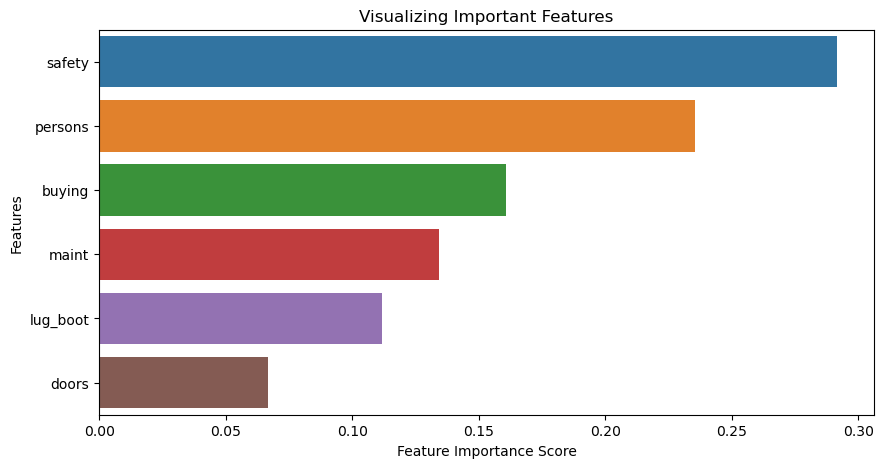

In [107]:
# Creating a seaborn bar plot

plt.figure(figsize = (10,5))

sns.barplot(x=feature_scores, y=feature_scores.index)

#Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

#Add title
plt.title('Visualizing Important Features')

plt.show()

## Building Random Forest model on selected features 

I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.



In [108]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [109]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [110]:
#Since THEY ARE ORDINAL VARIABLES
from category_encoders import OrdinalEncoder
# Define the columns to be encoded
ordinal_columns = ['buying', 'maint', 'persons', 'lug_boot', 'safety']

# Create an ordinal encoder object
encoder = OrdinalEncoder(cols=ordinal_columns)

# Fit the encoder on the training data and transform the training data
X_train = encoder.fit_transform(X_train)

# Transform the test data
X_test = encoder.transform(X_test)

In [111]:
#Building Model

# create the classifier with n_estimators = 10

clf = RandomForestClassifier(random_state=0)


# fit the modelto the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [112]:
# Predict on the test set results

y_pred_new = clf.predict(X_test)


In [113]:
# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred_new)))

Model accuracy score with doors variable removed : 0.9263


I have removed doors variable from the model, rebuild it and checked its accuracy. THe accuracy of the model without doors variable is 0.9263. The accuracy of the model with all the variables is 0.9649. We notice a drop in the accuracy. So, we shall continue forward with the initial model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

## Confusion matrix 

In [114]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[119   2   5   1]
 [  1  13   2   2]
 [  2   0 397   0]
 [  5   0   0  21]]


## Classification Report

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.94      0.94       127
        good       0.87      0.72      0.79        18
       unacc       0.98      0.99      0.99       399
       vgood       0.88      0.81      0.84        26

    accuracy                           0.96       570
   macro avg       0.92      0.87      0.89       570
weighted avg       0.96      0.96      0.96       570



# Results and conclusion 

1. In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 1000 decision-trees.
2. The model accuracy score with 10 decision-trees is 0.9649 but the same with 1000 decision-trees is 0.9702. So, as expected accuracy increases with number of decision-trees in the model.
3. I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.
4. I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9263. The accuracy of the model with all the variables taken into account is 0.9649. So, we can see that the model accuracy did not improve therefore we should keep all the features in our training set.
6. Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.